## Python Challenge

Importing important packages!!

In [1]:
import numpy as np
import pandas as pd

# https://plotly.com/python/getting-started/
# conda install -c plotly plotly=4.6.0
# conda install "notebook>=5.3" "ipywidgets>=7.2"
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from plotly.subplots import make_subplots
# import plotly.express as px
# import datetime

import seaborn as sns

In [2]:
#included data from plotly about life expectation with iso for orthographic projection excercise 
import plotly.express as px
df = px.data.gapminder()
df.head()

country continent  year  lifeExp       pop   gdpPercap iso_alpha  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314       AFG   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030       AFG   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710       AFG   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138       AFG   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106       AFG   

   iso_num  
0        4  
1        4  
2        4  
3        4  
4        4

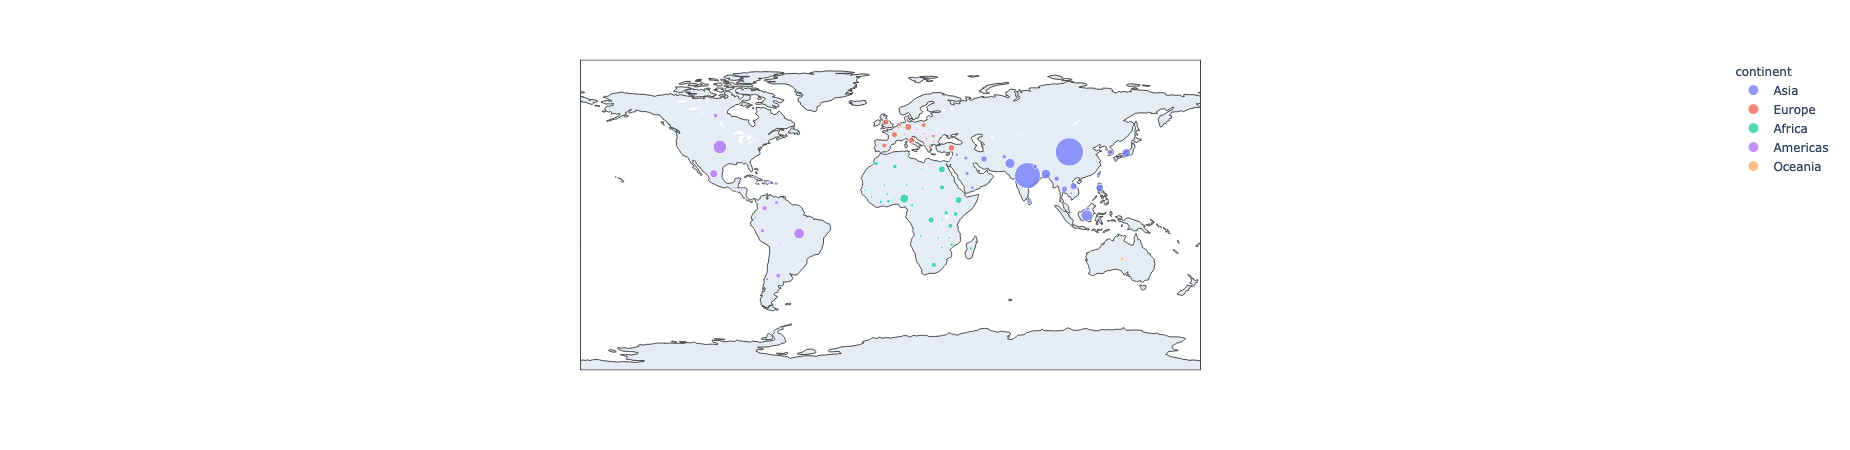

In [3]:
# example of bubble chart on the map
fig = px.scatter_geo(df.query("year==2007"), locations="iso_alpha", color="continent", size="pop")
fig.show()

**Task:** Using scatter plot, find a relationship between the life expectancy (lifeExp) and GDP gdpPercap in 2007. 

In [4]:
df_2 = df.query("year==2007")
df_2.head()

country continent  year  lifeExp       pop     gdpPercap iso_alpha  \
11  Afghanistan      Asia  2007   43.828  31889923    974.580338       AFG   
23      Albania    Europe  2007   76.423   3600523   5937.029526       ALB   
35      Algeria    Africa  2007   72.301  33333216   6223.367465       DZA   
47       Angola    Africa  2007   42.731  12420476   4797.231267       AGO   
59    Argentina  Americas  2007   75.320  40301927  12779.379640       ARG   

    iso_num  
11        4  
23        8  
35       12  
47       24  
59       32

In [5]:
df_2.shape

(142, 8)

In [6]:
df_2.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
iso_alpha     object
iso_num        int64
dtype: object

In [7]:
df_2.describe()

year     lifeExp           pop     gdpPercap     iso_num
count   142.0  142.000000  1.420000e+02    142.000000  142.000000
mean   2007.0   67.007423  4.402122e+07  11680.071820  425.880282
std       0.0   12.073021  1.476214e+08  12859.937337  249.111541
min    2007.0   39.613000  1.995790e+05    277.551859    4.000000
25%    2007.0   57.160250  4.508034e+06   1624.842248  209.500000
50%    2007.0   71.935500  1.051753e+07   6124.371109  410.000000
75%    2007.0   76.413250  3.121004e+07  18008.835640  636.000000
max    2007.0   82.603000  1.318683e+09  49357.190170  894.000000

In [8]:
df_2.describe(include='object')

country continent iso_alpha
count      142       142       142
unique     142         5       141
top      Nepal    Africa       KOR
freq         1        52         2

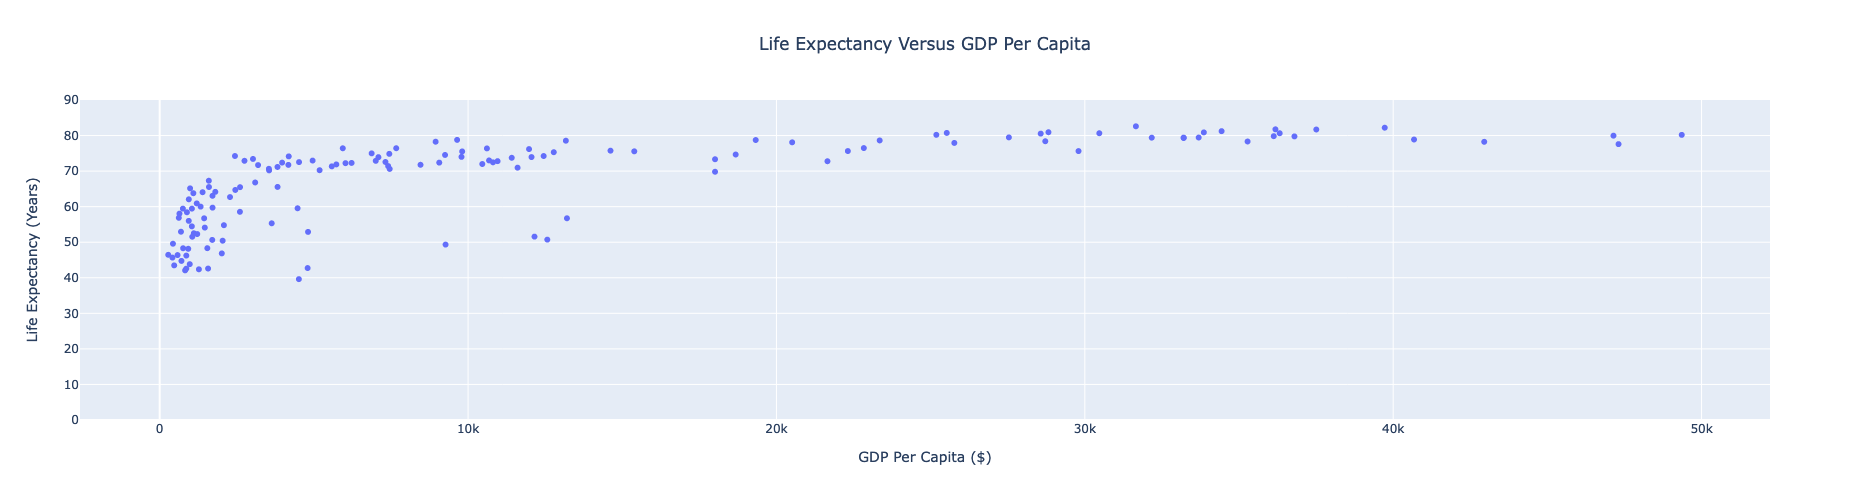

In [9]:
# First, try a regular scatter plot.

# create the data

data = [
    go.Scatter(
        x = df_2['gdpPercap'],
        y = df_2['lifeExp'],
        mode = 'markers'
    )
]

# create the layout 

layout = go.Layout(
    title = {
        'text': 'Life Expectancy Versus GDP Per Capita',
        'x': 0.5
    },
    xaxis = dict(title = 'GDP Per Capita ($)'), 
    yaxis = {
        'title': 'Life Expectancy (Years)',
        'range': [0, 90],
        'dtick': 10
    },
    hovermode ='closest',
    autosize = False,
    width = 900,
    height = 500
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()


From the above scatter plot, it appears that Life Expectancy 
is a logarithmic function of GDP Per Capita ($).

We will also look at the same plot but we will
use a logarithmic scale for GDP Per Capita ($).

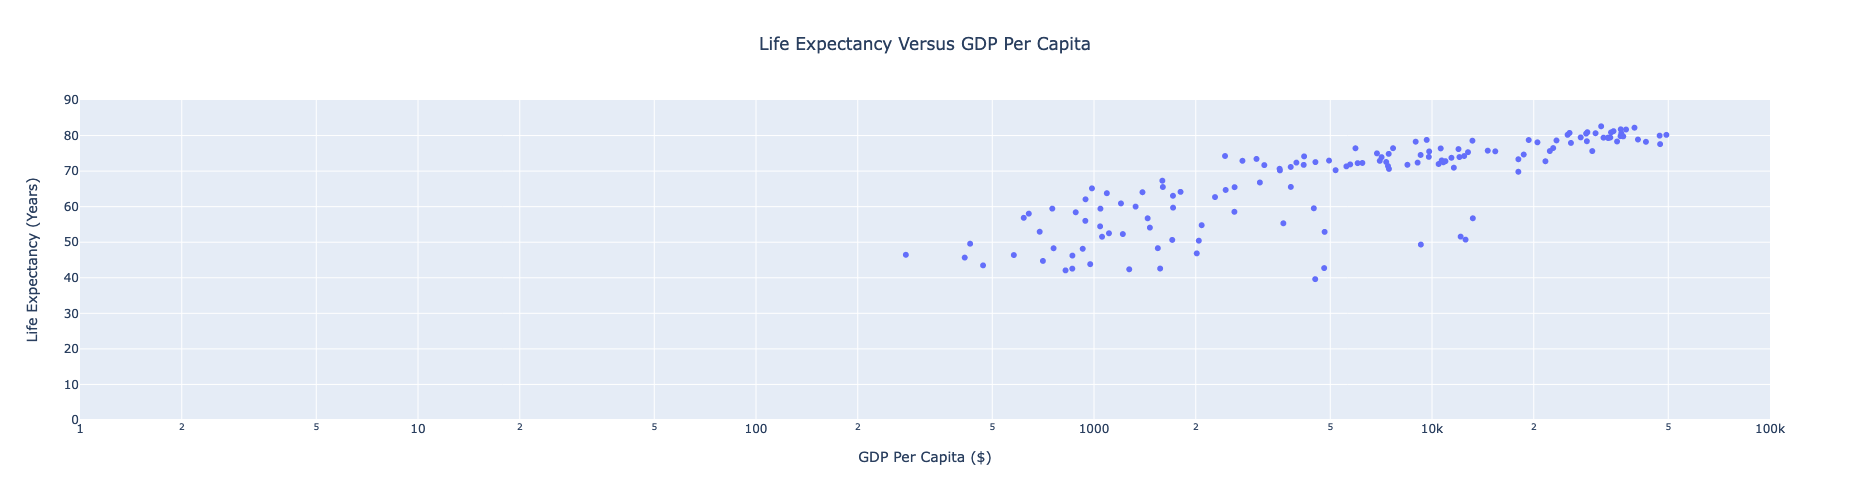

In [10]:
# Now, try a log plot.

# create the data

data = [
    go.Scatter(
        x = df_2['gdpPercap'],
        y = df_2['lifeExp'],
        mode = 'markers'
    )
]

# create the layout 

layout = go.Layout(
    title = {
        'text': 'Life Expectancy Versus GDP Per Capita',
        'x': 0.5
    },
    xaxis = {
        'title': 'GDP Per Capita ($)',
        'type': 'log',
        'range': [0, 5]
    },
    yaxis = {
        'title': 'Life Expectancy (Years)',
        'range': [0, 90],
        'dtick': 10
    },
    hovermode ='closest',
    autosize = False,
    width = 800,
    height = 500
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()


## Covid 19 Data

In [11]:
## COVID-19 Data
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
# country_df

In [12]:
country_df

Country_Region          Last_Update        Lat       Long_  \
0             Afghanistan  2023-03-10 13:21:02  33.939110   67.709953   
1                 Albania  2023-03-10 13:21:02  41.153300   20.168300   
2                 Algeria  2023-03-10 13:21:02  28.033900    1.659600   
3                 Andorra  2023-03-10 13:21:02  42.506300    1.521800   
4                  Angola  2023-03-10 13:21:02 -11.202700   17.873900   
..                    ...                  ...        ...         ...   
196    West Bank and Gaza  2023-03-10 13:21:02  31.952200   35.233200   
197  Winter Olympics 2022  2023-03-10 13:21:02  39.904200  116.407400   
198                 Yemen  2023-03-10 13:21:02  15.552727   48.516388   
199                Zambia  2023-03-10 13:21:02 -13.133897   27.849332   
200              Zimbabwe  2023-03-10 13:21:02 -19.015438   29.154857   

     Confirmed  Deaths  Recovered  Active  Incident_Rate  People_Tested  \
0       209484    7896        NaN     NaN     538.127222            NaN   
1       334457    3598        NaN     NaN   11621.968170            NaN   
2       271496    6881        NaN     NaN     619.132366            NaN   
3        47890     165        NaN     NaN   61981.492267            NaN   
4       105288    1933        NaN     NaN     320.352770            NaN   
..         ...     ...        ...     ...            ...            ...   
196     703228    5708        NaN     NaN   13784.956961            NaN   
197        535       0        NaN     NaN            NaN            NaN   
198      11945    2159        NaN     NaN      40.048994            NaN   
199     343135    4057        NaN     NaN    1866.491630            NaN   
200     264276    5671        NaN     NaN    1778.088529            NaN   

     People_Hospitalized  Mortality_Rate   UID ISO3  Cases_28_Days  \
0                    NaN        3.769262     4  AFG            680   
1                    NaN        1.075774     8  ALB            228   
2                    NaN        2.534476    12  DZA             90   
3                    NaN        0.344540    20  AND             30   
4                    NaN        1.835917    24  AGO            104   
..                   ...             ...   ...  ...            ...   
196                  NaN        0.811686   275  PSE              0   
197                  NaN        0.000000  2022  NaN              0   
198                  NaN       18.074508   887  YEM              0   
199                  NaN        1.182333   894  ZMB           1021   
200                  NaN        2.145863   716  ZWE           1193   

     Deaths_28_Days  
0               0.0  
1               2.0  
2               0.0  
3               0.0  
4               2.0  
..              ...  
196             0.0  
197             0.0  
198             0.0  
199             7.0  
200            12.0  

[201 rows x 16 columns]

We do some preprocessing for you!

In [13]:
country_df.columns = map(str.lower, country_df.columns)
country_df = country_df.rename(columns={'country_region': 'country', 'long_': 'long', 'iso3':'iso'})

In [14]:
country_df.head()

country          last_update       lat       long  confirmed  deaths  \
0  Afghanistan  2023-03-10 13:21:02  33.93911  67.709953     209484    7896   
1      Albania  2023-03-10 13:21:02  41.15330  20.168300     334457    3598   
2      Algeria  2023-03-10 13:21:02  28.03390   1.659600     271496    6881   
3      Andorra  2023-03-10 13:21:02  42.50630   1.521800      47890     165   
4       Angola  2023-03-10 13:21:02 -11.20270  17.873900     105288    1933   

   recovered  active  incident_rate  people_tested  people_hospitalized  \
0        NaN     NaN     538.127222            NaN                  NaN   
1        NaN     NaN   11621.968170            NaN                  NaN   
2        NaN     NaN     619.132366            NaN                  NaN   
3        NaN     NaN   61981.492267            NaN                  NaN   
4        NaN     NaN     320.352770            NaN                  NaN   

   mortality_rate  uid  iso  cases_28_days  deaths_28_days  
0        3.769262    4  AFG            680             0.0  
1        1.075774    8  ALB            228             2.0  
2        2.534476   12  DZA             90             0.0  
3        0.344540   20  AND             30             0.0  
4        1.835917   24  AGO            104             2.0

In [15]:
country_df.shape

(201, 16)

In [16]:
country_df.dtypes

country                 object
last_update             object
lat                    float64
long                   float64
confirmed                int64
deaths                   int64
recovered              float64
active                 float64
incident_rate          float64
people_tested          float64
people_hospitalized    float64
mortality_rate         float64
uid                      int64
iso                     object
cases_28_days            int64
deaths_28_days         float64
dtype: object

In [17]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              201 non-null    object 
 1   last_update          201 non-null    object 
 2   lat                  199 non-null    float64
 3   long                 199 non-null    float64
 4   confirmed            201 non-null    int64  
 5   deaths               201 non-null    int64  
 6   recovered            0 non-null      float64
 7   active               0 non-null      float64
 8   incident_rate        196 non-null    float64
 9   people_tested        0 non-null      float64
 10  people_hospitalized  0 non-null      float64
 11  mortality_rate       201 non-null    float64
 12  uid                  201 non-null    int64  
 13  iso                  197 non-null    object 
 14  cases_28_days        201 non-null    int64  
 15  deaths_28_days       200 non-null    flo

In [18]:
country_df.describe()

lat        long     confirmed        deaths  recovered  active  \
count  199.000000  199.000000  2.010000e+02  2.010000e+02        0.0     0.0   
mean    18.730091   21.601355  3.366219e+06  3.423858e+04        NaN     NaN   
std     24.708224   67.238747  1.012282e+07  1.108274e+05        NaN     NaN   
min    -71.949900 -175.198200  1.000000e+00  0.000000e+00        NaN     NaN   
25%      4.064892   -6.319850  3.749100e+04  3.720000e+02        NaN     NaN   
50%     17.357822   21.005900  3.173670e+05  3.164000e+03        NaN     NaN   
75%     40.106100   49.533194  1.704502e+06  1.907100e+04        NaN     NaN   
max     64.963100  178.065000  1.038043e+08  1.123836e+06        NaN     NaN   

       incident_rate  people_tested  people_hospitalized  mortality_rate  \
count     196.000000            0.0                  0.0      201.000000   
mean    17024.445212            NaN                  NaN        4.472958   
std     18863.623212            NaN                  NaN       42.272579   
min         0.003879            NaN                  NaN        0.000000   
25%      1212.303274            NaN                  NaN        0.516599   
50%      9781.598992            NaN                  NaN        1.075774   
75%     26743.612730            NaN                  NaN        1.918753   
max     69585.715128            NaN                  NaN      600.000000   

               uid  cases_28_days  deaths_28_days  
count   201.000000     201.000000      200.000000  
mean    531.935323   19975.427861      137.615000  
std     945.148116   86959.682983      733.444443  
min       4.000000       0.000000        0.000000  
25%     212.000000      16.000000        0.000000  
50%     428.000000     244.000000        0.000000  
75%     662.000000    3153.000000       35.250000  
max    9999.000000  959794.000000     9451.000000

In [19]:
country_df.describe(include='object')

country          last_update  iso
count      201                  201  197
unique     201                    2  197
top     Brunei  2023-03-10 13:21:02  COL
freq         1                  200    1

**Task:** Transform the number of confirmed cases to logarithmic scale.

In [20]:
# Import matplotlib.pyplot

import matplotlib.pyplot as plt

First, we will plot the distribution of confirmed cases.

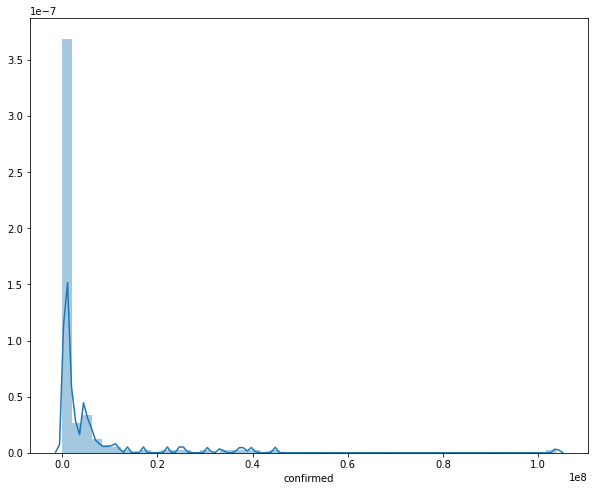

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(country_df['confirmed'])

Now, we will apply a log transformation to confirmed cases.

In [22]:
country_df['confirmed_log'] = country_df['confirmed'].apply(np.log)

In [23]:
country_df['confirmed_log'].describe()

count    201.000000
mean      12.435897
std        2.881263
min        0.000000
25%       10.531856
50%       12.667814
75%       14.348784
max       18.458018
Name: confirmed_log, dtype: float64

Now, we will plot the distribution of the 'confirmed_log' variable.

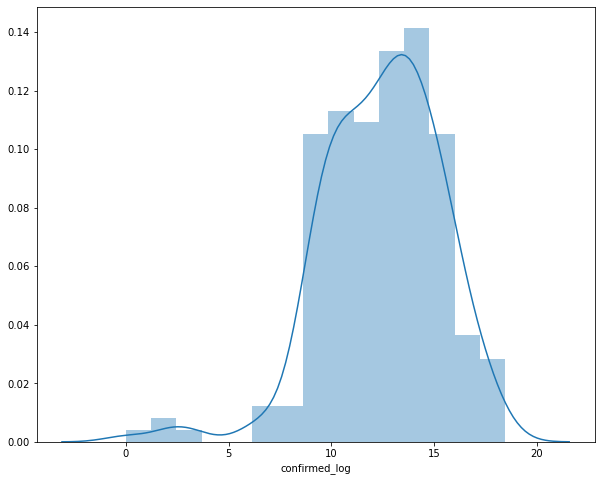

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.distplot(country_df['confirmed_log'])

**Task:** create color scale of your choice.

In [25]:
c_scale = [
    'chartreuse',
    'yellow',
    'goldenrod',
    'darkorange',
    'red'
]

**Task:** create two bubble charts:
- the one where the size of a bubble is confirmed cases of covid-19 per country
- the one where the size of a bubble is confirmed deaths of covid-19 per country

Use color scale you created earlier.

First, we will create the bubble chart where the size of
a bubble is confirmed cases of covid-19 per country.

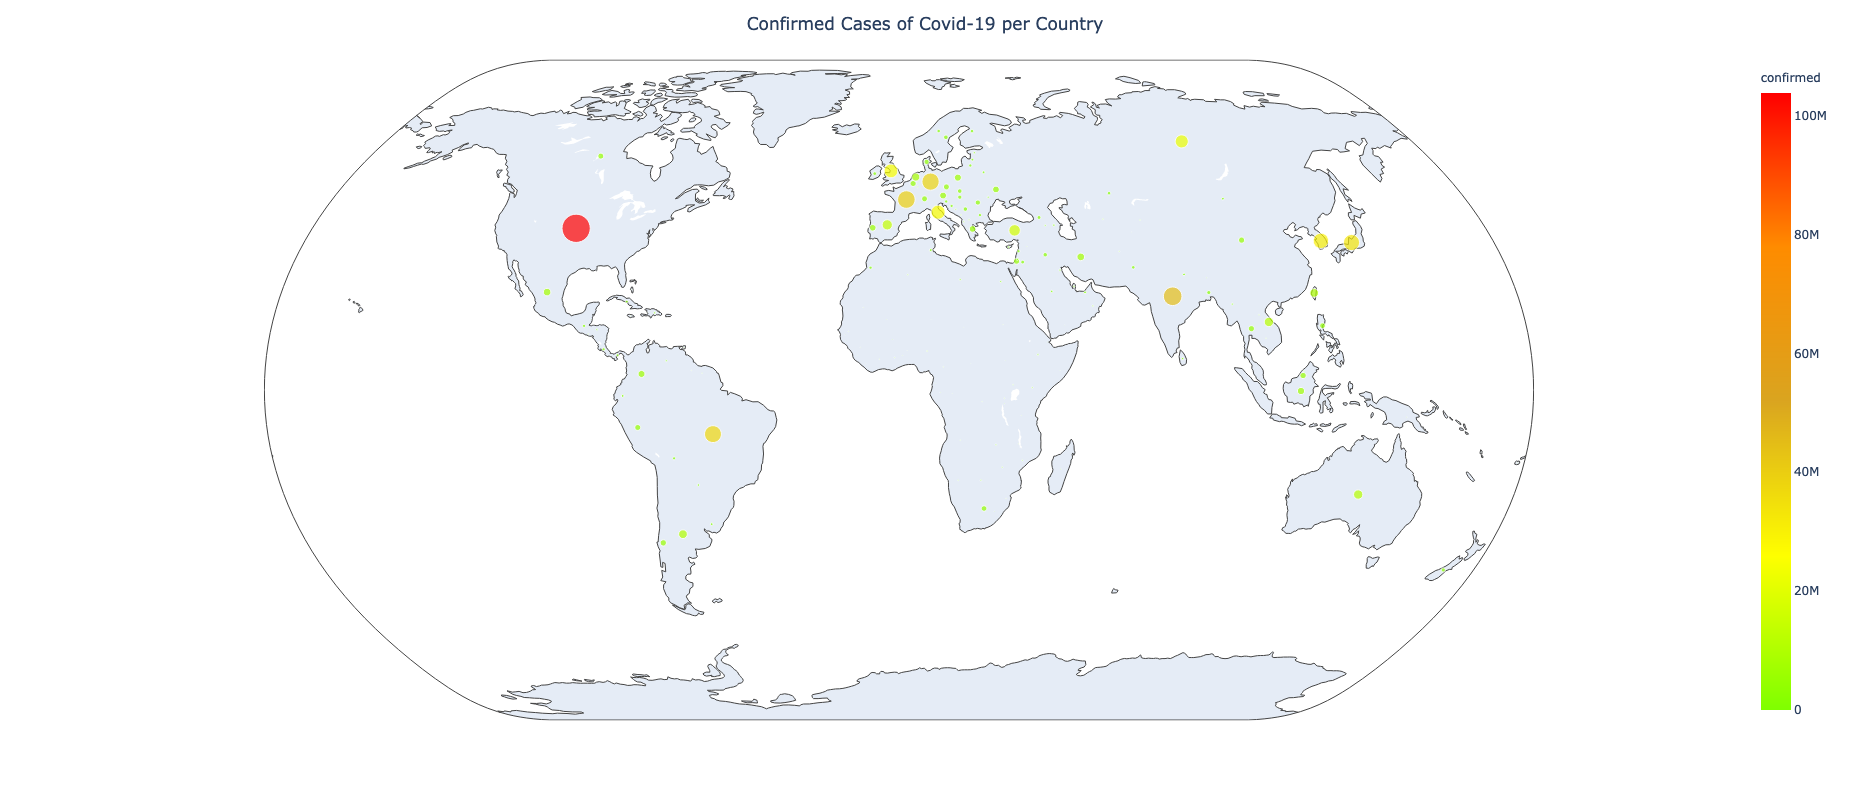

In [26]:
fig = px.scatter_geo(
    country_df, 
    locations="iso", 
    color="confirmed",
    hover_name="country", 
    size="confirmed",
    color_continuous_scale=c_scale,
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Cases of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

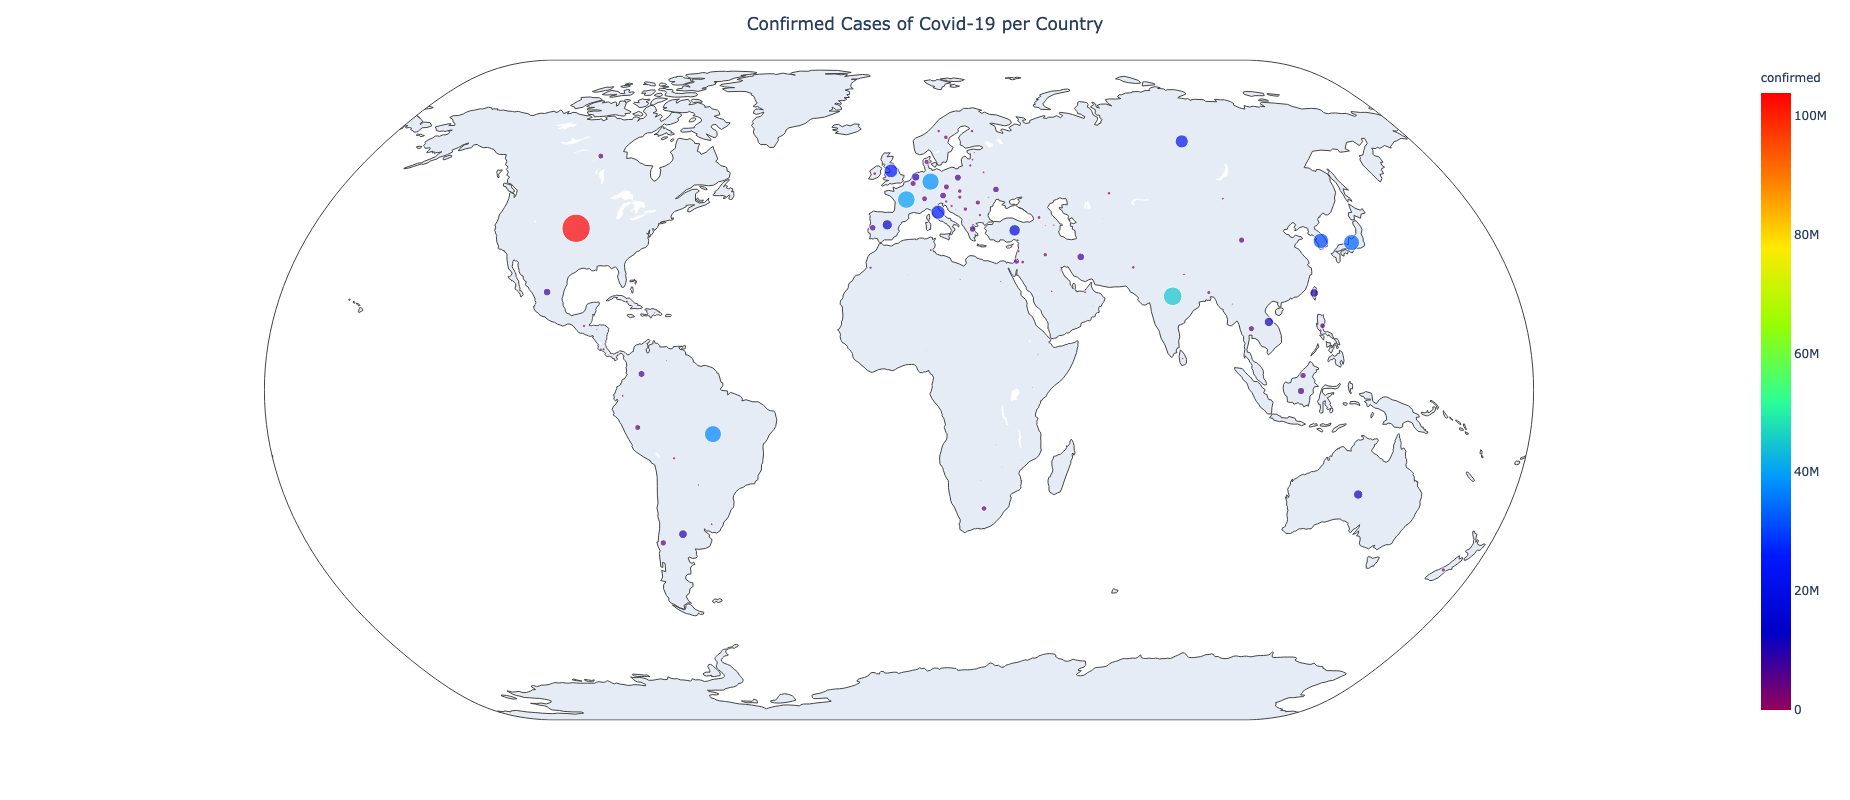

In [27]:
fig = px.scatter_geo(
    country_df, 
    locations="iso", 
    color="confirmed",
    hover_name="country", 
    size="confirmed",
    color_continuous_scale="Rainbow",
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Cases of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

Next, we will create the bubble chart where the size of 
a bubble is confirmed deaths of covid-19 per country.

In [28]:
fig = px.scatter_geo(
    country_df, 
    locations="iso", 
    color="deaths",
    hover_name="country", 
    size="deaths",
    color_continuous_scale=c_scale,
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Deaths of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

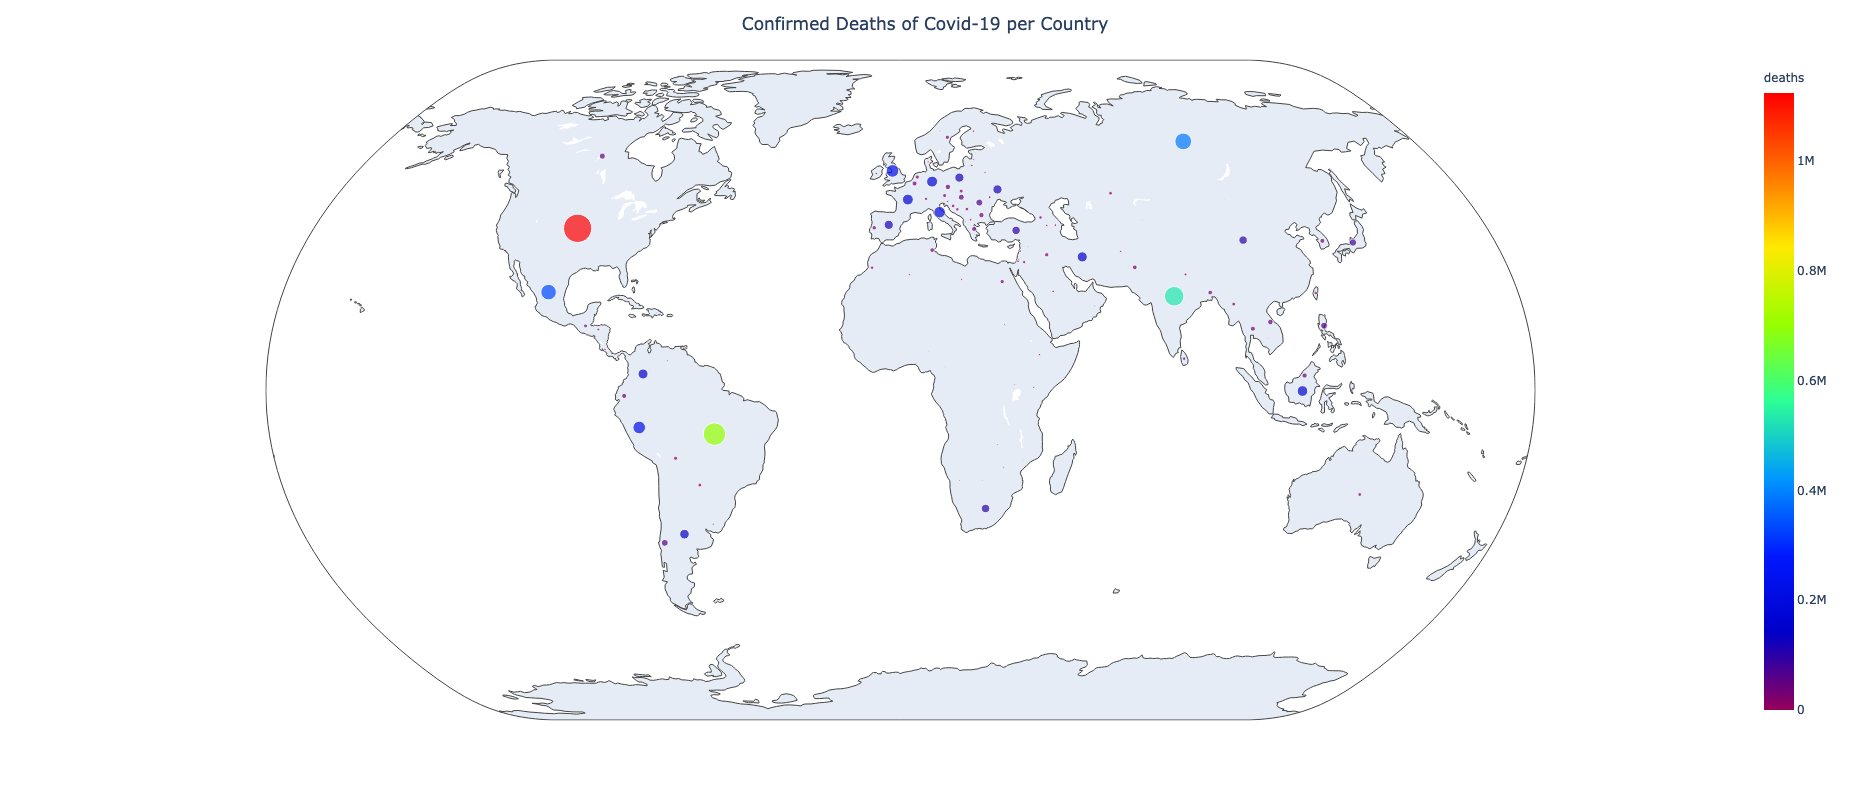

In [29]:
fig = px.scatter_geo(
    country_df, 
    locations="iso", 
    color="deaths",
    hover_name="country", 
    size="deaths",
    color_continuous_scale="Rainbow",
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Deaths of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

I think that the custom color scale works better with the second bubble map 
than with the first bubble map. Note that the bubble maps are similar.  This 
makes sense because the more cases of Covid-19 that a country has, then the 
more deaths due to Covid-19 that a country has. 

Also, note that the built-in 'Rainbow' color scale works better here than the 
custom color scale because you can see a better variation in the colors.

**Task:** create Choropleth map of the world where color of each country is based on the number of confirmed cases in the country

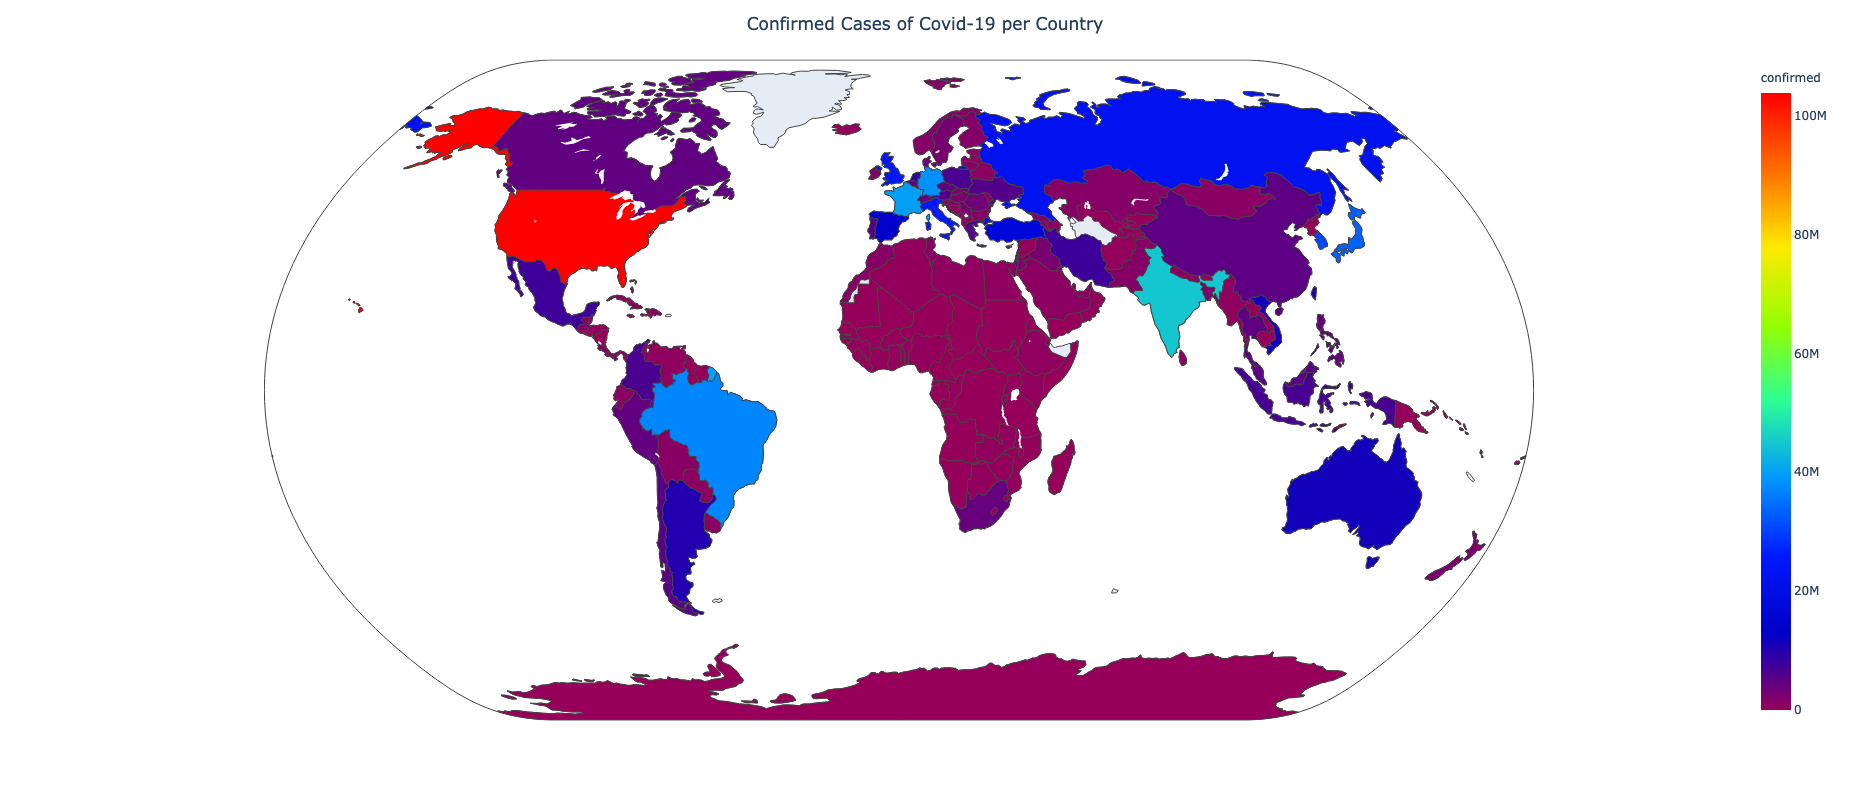

In [30]:
fig = px.choropleth(
    country_df, 
    locations="iso", 
    color="confirmed",
    hover_name="country", 
    color_continuous_scale="Rainbow",
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Cases of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

In [31]:
fig = px.choropleth(
    country_df, 
    locations="iso", 
    color="confirmed",
    hover_name="country", 
    color_continuous_scale=c_scale,
    projection="natural earth",
    width=1000,
    height=800
)

fig.update_layout(
    title_text="Confirmed Cases of Covid-19 per Country", 
    title_x=0.5
)

fig.show()

For the same reason as described above, the built-in 'Rainbow' color scale
works better here for the Choropleth map than the custom color scale.

**Task:** Create a function which takes counry as input and plots a chart with three lines: 
1. number of confirmed cases
2. number of deaths
3. number of recovered people

Little preprocessing from us:

In [32]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

confirmed_df.columns = map(str.lower, confirmed_df.columns)
confirmed_df = confirmed_df.rename(columns={'country/region': 'country', 'province/state': 'state'})

death_df.columns = map(str.lower, death_df.columns)
death_df = death_df.rename(columns={'country/region': 'country', 'province/state': 'state'})

recovered_df.columns = map(str.lower, recovered_df.columns)
recovered_df = recovered_df.rename(columns={'country/region': 'country', 'province/state': 'state'})

confirmed_clean  = confirmed_df.drop(['state', 'lat', 'long'], axis=1)
confirmed_clean.set_index('country', inplace=True)

death_clean  = death_df.drop(['state', 'lat', 'long'], axis=1)
death_clean.set_index('country', inplace=True)

recovered_clean  = recovered_df.drop(['state', 'lat', 'long'], axis=1)
recovered_clean.set_index('country', inplace=True)


First, we will do some data exploration.

We will start with the confirmed_df and confirmed_clean dataframes.

In [33]:
confirmed_df.head()

state      country       lat       long  1/22/20  1/23/20  1/24/20  1/25/20  \
0   NaN  Afghanistan  33.93911  67.709953        0        0        0        0   
1   NaN      Albania  41.15330  20.168300        0        0        0        0   
2   NaN      Algeria  28.03390   1.659600        0        0        0        0   
3   NaN      Andorra  42.50630   1.521800        0        0        0        0   
4   NaN       Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0        0        0  ...   209322  209340  209358  209362  209369  209390   
1        0        0  ...   334391  334408  334408  334427  334427  334427   
2        0        0  ...   271441  271448  271463  271469  271469  271477   
3        0        0  ...    47866   47875   47875   47875   47875   47875   
4        0        0  ...   105255  105277  105277  105277  105277  105277   

   3/6/23  3/7/23  3/8/23  3/9/23  
0  209406  209436  209451  209451  
1  334427  334427  334443  334457  
2  271477  271490  271494  271496  
3   47875   47875   47890   47890  
4  105277  105277  105288  105288  

[5 rows x 1147 columns]

In [34]:
confirmed_df.shape

(289, 1147)

In [35]:
confirmed_df.dtypes

state       object
country     object
lat        float64
long       float64
1/22/20      int64
            ...   
3/5/23       int64
3/6/23       int64
3/7/23       int64
3/8/23       int64
3/9/23       int64
Length: 1147, dtype: object

In [36]:
confirmed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, state to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [37]:
confirmed_df.describe()

lat        long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  287.000000  287.000000  289.000000  289.000000  289.000000  289.000000   
mean    19.718719   22.182084    1.927336    2.273356    3.266436    4.972318   
std     25.956609   77.870931   26.173664   26.270191   32.707271   45.523871   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.072192  -32.823050    0.000000    0.000000    0.000000    0.000000   
50%     21.512583   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     40.401784   89.224350    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       2/28/23  \
count   289.000000   289.000000   289.000000   289.000000  ...  2.890000e+02   
mean      7.335640    10.134948    19.307958    21.346021  ...  2.336755e+06   
std      63.623197    85.724481   210.329649   211.628535  ...  8.506608e+06   
min       0.000000     0.000000     0.000000     0.000000  ...  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  ...  1.456700e+04   
50%       0.000000     0.000000     0.000000     0.000000  ...  1.032480e+05   
75%       0.000000     0.000000     0.000000     0.000000  ...  1.051998e+06   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  1.034435e+08   

             3/1/23        3/2/23        3/3/23        3/4/23        3/5/23  \
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02   
mean   2.337519e+06  2.338173e+06  2.338805e+06  2.338992e+06  2.339187e+06   
std    8.511285e+06  8.514488e+06  8.518031e+06  8.518408e+06  8.518645e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04   
50%    1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05   
75%    1.052122e+06  1.052247e+06  1.052382e+06  1.052519e+06  1.052664e+06   
max    1.035339e+08  1.035898e+08  1.036487e+08  1.036508e+08  1.036470e+08   

             3/6/23        3/7/23        3/8/23        3/9/23  
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  
mean   2.339387e+06  2.339839e+06  2.340460e+06  2.341073e+06  
std    8.519346e+06  8.521641e+06  8.524968e+06  8.527765e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04  
50%    1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05  
75%    1.052664e+06  1.052926e+06  1.053068e+06  1.053213e+06  
max    1.036555e+08  1.036909e+08  1.037558e+08  1.038027e+08  

[8 rows x 1145 columns]

In [38]:
confirmed_df.describe(include='object')

state country
count      91     289
unique     91     201
top     Henan   China
freq        1      34

In [39]:
confirmed_clean.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
country                                                                      
Afghanistan        0        0        0        0        0        0        0   
Albania            0        0        0        0        0        0        0   
Algeria            0        0        0        0        0        0        0   
Andorra            0        0        0        0        0        0        0   
Angola             0        0        0        0        0        0        0   

             1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
country                                 ...                                    
Afghanistan        0        0        0  ...   209322  209340  209358  209362   
Albania            0        0        0  ...   334391  334408  334408  334427   
Algeria            0        0        0  ...   271441  271448  271463  271469   
Andorra            0        0        0  ...    47866   47875   47875   47875   
Angola             0        0        0  ...   105255  105277  105277  105277   

             3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
country                                                      
Afghanistan  209369  209390  209406  209436  209451  209451  
Albania      334427  334427  334427  334427  334443  334457  
Algeria      271469  271477  271477  271490  271494  271496  
Andorra       47875   47875   47875   47875   47890   47890  
Angola       105277  105277  105277  105277  105288  105288  

[5 rows x 1143 columns]

In [40]:
confirmed_clean.shape

(289, 1143)

In [41]:
confirmed_clean.dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
3/5/23     int64
3/6/23     int64
3/7/23     int64
3/8/23     int64
3/9/23     int64
Length: 1143, dtype: object

In [42]:
confirmed_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, Afghanistan to Zimbabwe
Columns: 1143 entries, 1/22/20 to 3/9/23
dtypes: int64(1143)
memory usage: 2.5+ MB


In [43]:
confirmed_clean.describe()

1/22/20     1/23/20     1/24/20     1/25/20      1/26/20  \
count  289.000000  289.000000  289.000000  289.000000   289.000000   
mean     1.927336    2.273356    3.266436    4.972318     7.335640   
std     26.173664   26.270191   32.707271   45.523871    63.623197   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.000000     0.000000   
50%      0.000000    0.000000    0.000000    0.000000     0.000000   
75%      0.000000    0.000000    0.000000    0.000000     0.000000   
max    444.000000  444.000000  549.000000  761.000000  1058.000000   

           1/27/20      1/28/20      1/29/20      1/30/20      1/31/20  ...  \
count   289.000000   289.000000   289.000000   289.000000   289.000000  ...   
mean     10.134948    19.307958    21.346021    28.501730    34.349481  ...   
std      85.724481   210.329649   211.628535   291.630499   345.759248  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max    1423.000000  3554.000000  3554.000000  4903.000000  5806.000000  ...   

            2/28/23        3/1/23        3/2/23        3/3/23        3/4/23  \
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02   
mean   2.336755e+06  2.337519e+06  2.338173e+06  2.338805e+06  2.338992e+06   
std    8.506608e+06  8.511285e+06  8.514488e+06  8.518031e+06  8.518408e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04   
50%    1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05   
75%    1.051998e+06  1.052122e+06  1.052247e+06  1.052382e+06  1.052519e+06   
max    1.034435e+08  1.035339e+08  1.035898e+08  1.036487e+08  1.036508e+08   

             3/5/23        3/6/23        3/7/23        3/8/23        3/9/23  
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  
mean   2.339187e+06  2.339387e+06  2.339839e+06  2.340460e+06  2.341073e+06  
std    8.518645e+06  8.519346e+06  8.521641e+06  8.524968e+06  8.527765e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04  1.456700e+04  
50%    1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05  1.032480e+05  
75%    1.052664e+06  1.052664e+06  1.052926e+06  1.053068e+06  1.053213e+06  
max    1.036470e+08  1.036555e+08  1.036909e+08  1.037558e+08  1.038027e+08  

[8 rows x 1143 columns]

We need to check if there are any missing values.

In [44]:
confirmed_df.isnull().sum()[(confirmed_df.isnull().sum()) > 0]

state    198
lat        2
long       2
dtype: int64

In [45]:
confirmed_clean.isnull().sum()[(confirmed_clean.isnull().sum()) > 0]

Series([], dtype: int64)

There are no missing values in the confirmed_clean dataframe and
this is the dataframe that we will be working with later on.

From the data exploration, we can see some countries appear
more than once.  This needs to be examined further.

In [46]:
# Create a dataframe from confirmed_df 
# where the countries appear more than once.

confirmed_df_2 = confirmed_df[(
    confirmed_df.duplicated(
        subset='country',
        keep=False
    )
)]

confirmed_df_2

state         country        lat  \
9                    Australian Capital Territory       Australia -35.473500   
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
..                                            ...             ...        ...   
274                                    Montserrat  United Kingdom  16.742498   
275                              Pitcairn Islands  United Kingdom -24.376800   
276  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
277                      Turks and Caicos Islands  United Kingdom  21.694000   
278                                           NaN  United Kingdom  55.378100   

           long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
9    149.012400        0        0        0        0        0        0  ...   
10   151.209300        0        0        0        0        3        4  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
274  -62.187366        0        0        0        0        0        0  ...   
275 -128.324200        0        0        0        0        0        0  ...   
276  -14.355900        0        0        0        0        0        0  ...   
277  -71.797900        0        0        0        0        0        0  ...   
278   -3.436000        0        0        0        0        0        0  ...   

      2/28/23    3/1/23    3/2/23    3/3/23    3/4/23    3/5/23    3/6/23  \
9      232018    232018    232619    232619    232619    232619    232619   
10    3900969   3900969   3908129   3908129   3908129   3908129   3908129   
11     104931    104931    105021    105021    105021    105021    105021   
12    1796633   1796633   1800236   1800236   1800236   1800236   1800236   
13     880207    880207    881911    881911    881911    881911    881911   
..        ...       ...       ...       ...       ...       ...       ...   
274      1403      1403      1403      1403      1403      1403      1403   
275         4         4         4         4         4         4         4   
276      2166      2166      2166      2166      2166      2166      2166   
277      6551      6551      6551      6551      6551      6551      6551   
278  24370150  24370150  24396530  24396530  24396530  24396530  24396530   

       3/7/23    3/8/23    3/9/23  
9      232619    232619    232974  
10    3908129   3908129   3915992  
11     105021    105021    105111  
12    1800236   1800236   1800236  
13     881911    881911    883620  
..        ...       ...       ...  
274      1403      1403      1403  
275         4         4         4  
276      2166      2166      2166  
277      6557      6557      6561  
278  24396530  24396530  24425309  

[96 rows x 1147 columns]

In [47]:
confirmed_df_2.shape

(96, 1147)

In [48]:
confirmed_df_2.describe(include='object')

state country
count      91      96
unique     91       8
top     Henan   China
freq        1      34

For confirmed_df_2, there are 91 unique states.
This means there are 5 rows where the "state" column has a null value.

In [49]:
# Check the rows of confirmed_df_2 where the "state" column has a null value. 

confirmed_df_2[(confirmed_df_2['state'].isnull())]

state         country      lat      long  1/22/20  1/23/20  1/24/20  \
105   NaN         Denmark  56.2639    9.5018        0        0        0   
131   NaN          France  46.2276    2.2137        0        0        2   
200   NaN     Netherlands  52.1326    5.2913        0        0        0   
203   NaN     New Zealand -40.9006  174.8860        0        0        0   
278   NaN  United Kingdom  55.3781   -3.4360        0        0        0   

     1/25/20  1/26/20  1/27/20  ...   2/28/23    3/1/23    3/2/23    3/3/23  \
105        0        0        0  ...   3403360   3403472   3403594   3403707   
131        3        3        3  ...  38579269  38583794  38587990  38591184   
200        0        0        0  ...   8596157   8596157   8596157   8598043   
203        0        0        0  ...   2216852   2216852   2216852   2216852   
278        0        0        0  ...  24370150  24370150  24396530  24396530   

       3/4/23    3/5/23    3/6/23    3/7/23    3/8/23    3/9/23  
105   3403707   3403707   3403958   3404128   3404268   3404407  
131  38591184  38591184  38599330  38606393  38612201  38618509  
200   8598043   8598043   8598043   8599981   8599981   8599981  
203   2216852   2228291   2228291   2228291   2228291   2228291  
278  24396530  24396530  24396530  24396530  24396530  24425309  

[5 rows x 1147 columns]

Since no states appear more than once, we should group the confirmed_df
and confirmed_clean dataframes by country and sum up each date column.  
This ensures that each country appears only once.
We will only need to do this for the confirmed_clean dataframe.

In [50]:
confirmed_clean_2 = confirmed_clean.groupby('country').sum()

In [51]:
confirmed_clean_2

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
country                                                                      
Afghanistan                 0        0        0        0        0        0   
Albania                     0        0        0        0        0        0   
Algeria                     0        0        0        0        0        0   
Andorra                     0        0        0        0        0        0   
Angola                      0        0        0        0        0        0   
...                       ...      ...      ...      ...      ...      ...   
West Bank and Gaza          0        0        0        0        0        0   
Winter Olympics 2022        0        0        0        0        0        0   
Yemen                       0        0        0        0        0        0   
Zambia                      0        0        0        0        0        0   
Zimbabwe                    0        0        0        0        0        0   

                      1/28/20  1/29/20  1/30/20  1/31/20  ...  2/28/23  \
country                                                   ...            
Afghanistan                 0        0        0        0  ...   209322   
Albania                     0        0        0        0  ...   334391   
Algeria                     0        0        0        0  ...   271441   
Andorra                     0        0        0        0  ...    47866   
Angola                      0        0        0        0  ...   105255   
...                       ...      ...      ...      ...  ...      ...   
West Bank and Gaza          0        0        0        0  ...   703228   
Winter Olympics 2022        0        0        0        0  ...      535   
Yemen                       0        0        0        0  ...    11945   
Zambia                      0        0        0        0  ...   343012   
Zimbabwe                    0        0        0        0  ...   263921   

                      3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  \
country                                                                        
Afghanistan           209340  209358  209362  209369  209390  209406  209436   
Albania               334408  334408  334427  334427  334427  334427  334427   
Algeria               271448  271463  271469  271469  271477  271477  271490   
Andorra                47875   47875   47875   47875   47875   47875   47875   
Angola                105277  105277  105277  105277  105277  105277  105277   
...                      ...     ...     ...     ...     ...     ...     ...   
West Bank and Gaza    703228  703228  703228  703228  703228  703228  703228   
Winter Olympics 2022     535     535     535     535     535     535     535   
Yemen                  11945   11945   11945   11945   11945   11945   11945   
Zambia                343012  343079  343079  343079  343135  343135  343135   
Zimbabwe              264127  264127  264127  264127  264127  264127  264127   

                      3/8/23  3/9/23  
country                               
Afghanistan           209451  209451  
Albania               334443  334457  
Algeria               271494  271496  
Andorra                47890   47890  
Angola                105288  105288  
...                      ...     ...  
West Bank and Gaza    703228  703228  
Winter Olympics 2022     535     535  
Yemen                  11945   11945  
Zambia                343135  343135  
Zimbabwe              264276  264276  

[201 rows x 1143 columns]

In [52]:
confirmed_clean_2.shape

(201, 1143)

Now, the confirmed_clean_2 dataframe is the dataframe that we 
will be using later on instead of the confirmed_clean dataframe.

Next, we will continue with the death_df and the death_clean dataframes.

In [53]:
death_df.head()

state      country       lat       long  1/22/20  1/23/20  1/24/20  1/25/20  \
0   NaN  Afghanistan  33.93911  67.709953        0        0        0        0   
1   NaN      Albania  41.15330  20.168300        0        0        0        0   
2   NaN      Algeria  28.03390   1.659600        0        0        0        0   
3   NaN      Andorra  42.50630   1.521800        0        0        0        0   
4   NaN       Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0        0        0  ...     7896    7896    7896    7896    7896    7896   
1        0        0  ...     3598    3598    3598    3598    3598    3598   
2        0        0  ...     6881    6881    6881    6881    6881    6881   
3        0        0  ...      165     165     165     165     165     165   
4        0        0  ...     1933    1933    1933    1933    1933    1933   

   3/6/23  3/7/23  3/8/23  3/9/23  
0    7896    7896    7896    7896  
1    3598    3598    3598    3598  
2    6881    6881    6881    6881  
3     165     165     165     165  
4    1933    1933    1933    1933  

[5 rows x 1147 columns]

In [54]:
death_df.shape

(289, 1147)

In [55]:
death_df.dtypes

state       object
country     object
lat        float64
long       float64
1/22/20      int64
            ...   
3/5/23       int64
3/6/23       int64
3/7/23       int64
3/8/23       int64
3/9/23       int64
Length: 1147, dtype: object

In [56]:
death_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, state to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


In [57]:
death_df.describe()

lat        long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  287.000000  287.000000  289.000000  289.000000  289.000000  289.000000   
mean    19.718719   22.182084    0.058824    0.062284    0.089965    0.145329   
std     25.956609   77.870931    1.000000    1.001525    1.413797    2.353998   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.072192  -32.823050    0.000000    0.000000    0.000000    0.000000   
50%     21.512583   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     40.401784   89.224350    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   17.000000   17.000000   24.000000   40.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...       2/28/23  \
count  289.000000  289.000000  289.000000  289.000000  ...  2.890000e+02   
mean     0.193772    0.283737    0.453287    0.460208  ...  2.378091e+04   
std      3.060245    4.471644    7.353103    7.353616  ...  9.337339e+04   
min      0.000000    0.000000    0.000000    0.000000  ...  0.000000e+00   
25%      0.000000    0.000000    0.000000    0.000000  ...  6.600000e+01   
50%      0.000000    0.000000    0.000000    0.000000  ...  9.440000e+02   
75%      0.000000    0.000000    0.000000    0.000000  ...  8.721000e+03   
max     52.000000   76.000000  125.000000  125.000000  ...  1.119917e+06   

             3/1/23        3/2/23        3/3/23        3/4/23        3/5/23  \
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02   
mean   2.378707e+04  2.379249e+04  2.379697e+04  2.379793e+04  2.379844e+04   
std    9.341836e+04  9.345110e+04  9.347703e+04  9.347884e+04  9.347810e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01   
50%    9.440000e+02  9.520000e+02  9.520000e+02  9.520000e+02  9.520000e+02   
75%    8.721000e+03  8.721000e+03  8.721000e+03  8.721000e+03  8.721000e+03   
max    1.120897e+06  1.121658e+06  1.122165e+06  1.122172e+06  1.122134e+06   

             3/6/23        3/7/23        3/8/23        3/9/23  
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  
mean   2.379971e+04  2.380290e+04  2.380790e+04  2.381246e+04  
std    9.348106e+04  9.349767e+04  9.352985e+04  9.355567e+04  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  
50%    9.520000e+02  9.520000e+02  9.520000e+02  9.520000e+02  
75%    8.721000e+03  8.721000e+03  8.727000e+03  8.727000e+03  
max    1.122181e+06  1.122516e+06  1.123246e+06  1.123836e+06  

[8 rows x 1145 columns]

In [58]:
death_df.describe(include='object')

state country
count      91     289
unique     91     201
top     Henan   China
freq        1      34

In [59]:
death_clean.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
country                                                                      
Afghanistan        0        0        0        0        0        0        0   
Albania            0        0        0        0        0        0        0   
Algeria            0        0        0        0        0        0        0   
Andorra            0        0        0        0        0        0        0   
Angola             0        0        0        0        0        0        0   

             1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
country                                 ...                                    
Afghanistan        0        0        0  ...     7896    7896    7896    7896   
Albania            0        0        0  ...     3598    3598    3598    3598   
Algeria            0        0        0  ...     6881    6881    6881    6881   
Andorra            0        0        0  ...      165     165     165     165   
Angola             0        0        0  ...     1933    1933    1933    1933   

             3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
country                                                      
Afghanistan    7896    7896    7896    7896    7896    7896  
Albania        3598    3598    3598    3598    3598    3598  
Algeria        6881    6881    6881    6881    6881    6881  
Andorra         165     165     165     165     165     165  
Angola         1933    1933    1933    1933    1933    1933  

[5 rows x 1143 columns]

In [60]:
death_clean.shape

(289, 1143)

In [61]:
death_clean.dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
3/5/23     int64
3/6/23     int64
3/7/23     int64
3/8/23     int64
3/9/23     int64
Length: 1143, dtype: object

In [62]:
death_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, Afghanistan to Zimbabwe
Columns: 1143 entries, 1/22/20 to 3/9/23
dtypes: int64(1143)
memory usage: 2.5+ MB


In [63]:
death_clean.describe()

1/22/20     1/23/20     1/24/20     1/25/20     1/26/20     1/27/20  \
count  289.000000  289.000000  289.000000  289.000000  289.000000  289.000000   
mean     0.058824    0.062284    0.089965    0.145329    0.193772    0.283737   
std      1.000000    1.001525    1.413797    2.353998    3.060245    4.471644   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     17.000000   17.000000   24.000000   40.000000   52.000000   76.000000   

          1/28/20     1/29/20     1/30/20     1/31/20  ...       2/28/23  \
count  289.000000  289.000000  289.000000  289.000000  ...  2.890000e+02   
mean     0.453287    0.460208    0.595156    0.740484  ...  2.378091e+04   
std      7.353103    7.353616    9.529857   11.999933  ...  9.337339e+04   
min      0.000000    0.000000    0.000000    0.000000  ...  0.000000e+00   
25%      0.000000    0.000000    0.000000    0.000000  ...  6.600000e+01   
50%      0.000000    0.000000    0.000000    0.000000  ...  9.440000e+02   
75%      0.000000    0.000000    0.000000    0.000000  ...  8.721000e+03   
max    125.000000  125.000000  162.000000  204.000000  ...  1.119917e+06   

             3/1/23        3/2/23        3/3/23        3/4/23        3/5/23  \
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02   
mean   2.378707e+04  2.379249e+04  2.379697e+04  2.379793e+04  2.379844e+04   
std    9.341836e+04  9.345110e+04  9.347703e+04  9.347884e+04  9.347810e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01   
50%    9.440000e+02  9.520000e+02  9.520000e+02  9.520000e+02  9.520000e+02   
75%    8.721000e+03  8.721000e+03  8.721000e+03  8.721000e+03  8.721000e+03   
max    1.120897e+06  1.121658e+06  1.122165e+06  1.122172e+06  1.122134e+06   

             3/6/23        3/7/23        3/8/23        3/9/23  
count  2.890000e+02  2.890000e+02  2.890000e+02  2.890000e+02  
mean   2.379971e+04  2.380290e+04  2.380790e+04  2.381246e+04  
std    9.348106e+04  9.349767e+04  9.352985e+04  9.355567e+04  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    6.600000e+01  6.600000e+01  6.600000e+01  6.600000e+01  
50%    9.520000e+02  9.520000e+02  9.520000e+02  9.520000e+02  
75%    8.721000e+03  8.721000e+03  8.727000e+03  8.727000e+03  
max    1.122181e+06  1.122516e+06  1.123246e+06  1.123836e+06  

[8 rows x 1143 columns]

We need to check if there are any missing values.

In [64]:
death_df.isnull().sum()[(death_df.isnull().sum()) > 0]

state    198
lat        2
long       2
dtype: int64

In [65]:
death_clean.isnull().sum()[(death_clean.isnull().sum()) > 0]

Series([], dtype: int64)

There are no missing values in the death_clean dataframe.

From the data exploration, we can see some countries appear
more than once.  This needs to be examined further.

In [66]:
# Create a dataframe from death_df 
# where the countries appear more than once.

death_df_2 = death_df[(
    death_df.duplicated(
        subset='country',
        keep=False
    )
)]

death_df_2

state         country        lat  \
9                    Australian Capital Territory       Australia -35.473500   
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
..                                            ...             ...        ...   
274                                    Montserrat  United Kingdom  16.742498   
275                              Pitcairn Islands  United Kingdom -24.376800   
276  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
277                      Turks and Caicos Islands  United Kingdom  21.694000   
278                                           NaN  United Kingdom  55.378100   

           long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
9    149.012400        0        0        0        0        0        0  ...   
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
274  -62.187366        0        0        0        0        0        0  ...   
275 -128.324200        0        0        0        0        0        0  ...   
276  -14.355900        0        0        0        0        0        0  ...   
277  -71.797900        0        0        0        0        0        0  ...   
278   -3.436000        0        0        0        0        0        0  ...   

     2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
9        224     224     228     228     228     228     228     228     228   
10      6464    6464    6493    6493    6493    6493    6493    6493    6493   
11        90      90      90      90      90      90      90      90      90   
12      2760    2760    2783    2783    2783    2783    2783    2783    2783   
13      1322    1322    1322    1322    1322    1322    1322    1322    1322   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
274        8       8       8       8       8       8       8       8       8   
275        0       0       0       0       0       0       0       0       0   
276        0       0       0       0       0       0       0       0       0   
277       38      38      38      38      38      38      38      38      38   
278   219948  219948  219948  219948  219948  219948  219948  219948  219948   

     3/9/23  
9       228  
10     6529  
11       91  
12     2783  
13     1365  
..      ...  
274       8  
275       0  
276       0  
277      38  
278  219948  

[96 rows x 1147 columns]

In [67]:
death_df_2.shape

(96, 1147)

In [68]:
death_df_2.describe(include='object')

state country
count      91      96
unique     91       8
top     Henan   China
freq        1      34

For death_df_2, there are 91 unique states.
This means there are 5 rows where the "state" column has a null value.

In [69]:
# Check the rows of death_df_2 where the "state" column has a null value. 

death_df_2[(death_df_2['state'].isnull())]

state         country      lat      long  1/22/20  1/23/20  1/24/20  \
105   NaN         Denmark  56.2639    9.5018        0        0        0   
131   NaN          France  46.2276    2.2137        0        0        0   
200   NaN     Netherlands  52.1326    5.2913        0        0        0   
203   NaN     New Zealand -40.9006  174.8860        0        0        0   
278   NaN  United Kingdom  55.3781   -3.4360        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
105        0        0        0  ...     8265    8269    8272    8274    8274   
131        0        0        0  ...   161340  161365  161386  161407  161407   
200        0        0        0  ...    22990   22990   22990   22990   22990   
203        0        0        0  ...     2542    2542    2542    2542    2542   
278        0        0        0  ...   219948  219948  219948  219948  219948   

     3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
105    8274    8284    8285    8292    8296  
131  161407  161450  161474  161501  161512  
200   22990   22990   22990   22990   22990  
203    2548    2548    2548    2548    2548  
278  219948  219948  219948  219948  219948  

[5 rows x 1147 columns]

Since no states appear more than once, we should group the death_df
and death_clean dataframes by country and sum up each date column. 
This ensures that each country appears only once.
We will only need to do this for the death_clean dataframe.

In [70]:
death_clean_2 = death_clean.groupby('country').sum()

In [71]:
death_clean_2

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
country                                                                      
Afghanistan                 0        0        0        0        0        0   
Albania                     0        0        0        0        0        0   
Algeria                     0        0        0        0        0        0   
Andorra                     0        0        0        0        0        0   
Angola                      0        0        0        0        0        0   
...                       ...      ...      ...      ...      ...      ...   
West Bank and Gaza          0        0        0        0        0        0   
Winter Olympics 2022        0        0        0        0        0        0   
Yemen                       0        0        0        0        0        0   
Zambia                      0        0        0        0        0        0   
Zimbabwe                    0        0        0        0        0        0   

                      1/28/20  1/29/20  1/30/20  1/31/20  ...  2/28/23  \
country                                                   ...            
Afghanistan                 0        0        0        0  ...     7896   
Albania                     0        0        0        0  ...     3598   
Algeria                     0        0        0        0  ...     6881   
Andorra                     0        0        0        0  ...      165   
Angola                      0        0        0        0  ...     1933   
...                       ...      ...      ...      ...  ...      ...   
West Bank and Gaza          0        0        0        0  ...     5708   
Winter Olympics 2022        0        0        0        0  ...        0   
Yemen                       0        0        0        0  ...     2159   
Zambia                      0        0        0        0  ...     4057   
Zimbabwe                    0        0        0        0  ...     5663   

                      3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  \
country                                                                        
Afghanistan             7896    7896    7896    7896    7896    7896    7896   
Albania                 3598    3598    3598    3598    3598    3598    3598   
Algeria                 6881    6881    6881    6881    6881    6881    6881   
Andorra                  165     165     165     165     165     165     165   
Angola                  1933    1933    1933    1933    1933    1933    1933   
...                      ...     ...     ...     ...     ...     ...     ...   
West Bank and Gaza      5708    5708    5708    5708    5708    5708    5708   
Winter Olympics 2022       0       0       0       0       0       0       0   
Yemen                   2159    2159    2159    2159    2159    2159    2159   
Zambia                  4057    4057    4057    4057    4057    4057    4057   
Zimbabwe                5668    5668    5668    5668    5668    5668    5668   

                      3/8/23  3/9/23  
country                               
Afghanistan             7896    7896  
Albania                 3598    3598  
Algeria                 6881    6881  
Andorra                  165     165  
Angola                  1933    1933  
...                      ...     ...  
West Bank and Gaza      5708    5708  
Winter Olympics 2022       0       0  
Yemen                   2159    2159  
Zambia                  4057    4057  
Zimbabwe                5671    5671  

[201 rows x 1143 columns]

In [72]:
death_clean_2.shape

(201, 1143)

Now, the death_clean_2 dataframe is the dataframe that we 
will be using later on instead of the death_clean dataframe.

In [73]:
recovered_df.head()

state      country       lat       long  1/22/20  1/23/20  1/24/20  1/25/20  \
0   NaN  Afghanistan  33.93911  67.709953        0        0        0        0   
1   NaN      Albania  41.15330  20.168300        0        0        0        0   
2   NaN      Algeria  28.03390   1.659600        0        0        0        0   
3   NaN      Andorra  42.50630   1.521800        0        0        0        0   
4   NaN       Angola -11.20270  17.873900        0        0        0        0   

   1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  \
0        0        0  ...        0       0       0       0       0       0   
1        0        0  ...        0       0       0       0       0       0   
2        0        0  ...        0       0       0       0       0       0   
3        0        0  ...        0       0       0       0       0       0   
4        0        0  ...        0       0       0       0       0       0   

   3/6/23  3/7/23  3/8/23  3/9/23  
0       0       0       0       0  
1       0       0       0       0  
2       0       0       0       0  
3       0       0       0       0  
4       0       0       0       0  

[5 rows x 1147 columns]

In [74]:
recovered_df.shape

(274, 1147)

In [75]:
recovered_df.dtypes

state       object
country     object
lat        float64
long       float64
1/22/20      int64
            ...   
3/5/23       int64
3/6/23       int64
3/7/23       int64
3/8/23       int64
3/9/23       int64
Length: 1147, dtype: object

In [76]:
recovered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1147 entries, state to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.4+ MB


In [77]:
recovered_df.describe()

lat        long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  273.000000  273.000000  274.000000  274.000000  274.000000  274.000000   
mean    18.318242   27.325980    0.109489    0.116788    0.142336    0.153285   
std     25.442128   75.783947    1.695410    1.699238    1.886378    1.949511   
min    -71.949900 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      3.919300   -9.696600    0.000000    0.000000    0.000000    0.000000   
50%     19.195900   23.881300    0.000000    0.000000    0.000000    0.000000   
75%     39.074200   95.995600    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000   28.000000   28.000000   31.000000   32.000000   

          1/26/20     1/27/20     1/28/20     1/29/20  ...  2/28/23  3/1/23  \
count  274.000000  274.000000  274.000000  274.000000  ...    274.0   274.0   
mean     0.204380    0.237226    0.394161    0.463504  ...      0.0     0.0   
std      2.568159    2.761311    4.866508    5.352804  ...      0.0     0.0   
min      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
25%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
50%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
75%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
max     42.000000   45.000000   80.000000   88.000000  ...      0.0     0.0   

       3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
count   274.0   274.0   274.0   274.0   274.0   274.0   274.0   274.0  
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[8 rows x 1145 columns]

In [78]:
recovered_df.describe(include='object')

state country
count         75     274
unique        75     201
top     Xinjiang   China
freq           1      34

In [79]:
recovered_clean.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
country                                                                      
Afghanistan        0        0        0        0        0        0        0   
Albania            0        0        0        0        0        0        0   
Algeria            0        0        0        0        0        0        0   
Andorra            0        0        0        0        0        0        0   
Angola             0        0        0        0        0        0        0   

             1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
country                                 ...                                    
Afghanistan        0        0        0  ...        0       0       0       0   
Albania            0        0        0  ...        0       0       0       0   
Algeria            0        0        0  ...        0       0       0       0   
Andorra            0        0        0  ...        0       0       0       0   
Angola             0        0        0  ...        0       0       0       0   

             3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
country                                                      
Afghanistan       0       0       0       0       0       0  
Albania           0       0       0       0       0       0  
Algeria           0       0       0       0       0       0  
Andorra           0       0       0       0       0       0  
Angola            0       0       0       0       0       0  

[5 rows x 1143 columns]

In [80]:
recovered_clean.shape

(274, 1143)

In [81]:
recovered_clean.dtypes

1/22/20    int64
1/23/20    int64
1/24/20    int64
1/25/20    int64
1/26/20    int64
           ...  
3/5/23     int64
3/6/23     int64
3/7/23     int64
3/8/23     int64
3/9/23     int64
Length: 1143, dtype: object

In [82]:
recovered_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, Afghanistan to Zimbabwe
Columns: 1143 entries, 1/22/20 to 3/9/23
dtypes: int64(1143)
memory usage: 2.4+ MB


In [83]:
recovered_clean.describe()

1/22/20     1/23/20     1/24/20     1/25/20     1/26/20     1/27/20  \
count  274.000000  274.000000  274.000000  274.000000  274.000000  274.000000   
mean     0.109489    0.116788    0.142336    0.153285    0.204380    0.237226   
std      1.695410    1.699238    1.886378    1.949511    2.568159    2.761311   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     28.000000   28.000000   31.000000   32.000000   42.000000   45.000000   

          1/28/20     1/29/20     1/30/20     1/31/20  ...  2/28/23  3/1/23  \
count  274.000000  274.000000  274.000000  274.000000  ...    274.0   274.0   
mean     0.394161    0.463504    0.529197    0.821168  ...      0.0     0.0   
std      4.866508    5.352804    5.508657    8.624065  ...      0.0     0.0   
min      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
25%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
50%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
75%      0.000000    0.000000    0.000000    0.000000  ...      0.0     0.0   
max     80.000000   88.000000   90.000000  141.000000  ...      0.0     0.0   

       3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
count   274.0   274.0   274.0   274.0   274.0   274.0   274.0   274.0  
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[8 rows x 1143 columns]

We need to check if there are any missing values.

In [84]:
recovered_df.isnull().sum()[(recovered_df.isnull().sum()) > 0]

state    199
lat        1
long       1
dtype: int64

In [85]:
recovered_clean.isnull().sum()[(recovered_clean.isnull().sum()) > 0]

Series([], dtype: int64)

There are no missing values in the recovered_clean dataframe.

From the data exploration, we can see some countries appear
more than once.  This needs to be examined further.

In [86]:
# Create a dataframe from recovered_df 
# where the countries appear more than once.

recovered_df_2 = recovered_df[(
    recovered_df.duplicated(
        subset='country',
        keep=False
    )
)]

recovered_df_2

state         country        lat  \
9                    Australian Capital Territory       Australia -35.473500   
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
..                                            ...             ...        ...   
259                                    Montserrat  United Kingdom  16.742498   
260                              Pitcairn Islands  United Kingdom -24.376800   
261  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
262                      Turks and Caicos Islands  United Kingdom  21.694000   
263                                           NaN  United Kingdom  55.378100   

           long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
9    149.012400        0        0        0        0        0        0  ...   
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
259  -62.187366        0        0        0        0        0        0  ...   
260 -128.324200        0        0        0        0        0        0  ...   
261  -14.355900        0        0        0        0        0        0  ...   
262  -71.797900        0        0        0        0        0        0  ...   
263   -3.436000        0        0        0        0        0        0  ...   

     2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  \
9          0       0       0       0       0       0       0       0       0   
10         0       0       0       0       0       0       0       0       0   
11         0       0       0       0       0       0       0       0       0   
12         0       0       0       0       0       0       0       0       0   
13         0       0       0       0       0       0       0       0       0   
..       ...     ...     ...     ...     ...     ...     ...     ...     ...   
259        0       0       0       0       0       0       0       0       0   
260        0       0       0       0       0       0       0       0       0   
261        0       0       0       0       0       0       0       0       0   
262        0       0       0       0       0       0       0       0       0   
263        0       0       0       0       0       0       0       0       0   

     3/9/23  
9         0  
10        0  
11        0  
12        0  
13        0  
..      ...  
259       0  
260       0  
261       0  
262       0  
263       0  

[80 rows x 1147 columns]

In [87]:
recovered_df_2.shape

(80, 1147)

In [88]:
recovered_df_2.describe(include='object')

state country
count         75      80
unique        75       7
top     Xinjiang   China
freq           1      34

For recovered_df_2, there are 75 unique states.
This means there are 5 rows where the "state" column has a null value.

In [89]:
# Check the rows of recovered_df_2 where the "state" column has a null value. 

recovered_df_2[(recovered_df_2['state'].isnull())]

state         country      lat      long  1/22/20  1/23/20  1/24/20  \
90    NaN         Denmark  56.2639    9.5018        0        0        0   
116   NaN          France  46.2276    2.2137        0        0        0   
185   NaN     Netherlands  52.1326    5.2913        0        0        0   
188   NaN     New Zealand -40.9006  174.8860        0        0        0   
263   NaN  United Kingdom  55.3781   -3.4360        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  3/4/23  \
90         0        0        0  ...        0       0       0       0       0   
116        0        0        0  ...        0       0       0       0       0   
185        0        0        0  ...        0       0       0       0       0   
188        0        0        0  ...        0       0       0       0       0   
263        0        0        0  ...        0       0       0       0       0   

     3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
90        0       0       0       0       0  
116       0       0       0       0       0  
185       0       0       0       0       0  
188       0       0       0       0       0  
263       0       0       0       0       0  

[5 rows x 1147 columns]

Since no states appear more than once, we should group the recovered_df
and recovered_clean dataframes by country and sum up each date column. 
This ensures that each country appears only once.
We will only need to do this for the recovered_clean dataframe.

In [90]:
recovered_clean_2 = recovered_clean.groupby('country').sum()

In [91]:
recovered_clean_2

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
country                                                                      
Afghanistan                 0        0        0        0        0        0   
Albania                     0        0        0        0        0        0   
Algeria                     0        0        0        0        0        0   
Andorra                     0        0        0        0        0        0   
Angola                      0        0        0        0        0        0   
...                       ...      ...      ...      ...      ...      ...   
West Bank and Gaza          0        0        0        0        0        0   
Winter Olympics 2022        0        0        0        0        0        0   
Yemen                       0        0        0        0        0        0   
Zambia                      0        0        0        0        0        0   
Zimbabwe                    0        0        0        0        0        0   

                      1/28/20  1/29/20  1/30/20  1/31/20  ...  2/28/23  \
country                                                   ...            
Afghanistan                 0        0        0        0  ...        0   
Albania                     0        0        0        0  ...        0   
Algeria                     0        0        0        0  ...        0   
Andorra                     0        0        0        0  ...        0   
Angola                      0        0        0        0  ...        0   
...                       ...      ...      ...      ...  ...      ...   
West Bank and Gaza          0        0        0        0  ...        0   
Winter Olympics 2022        0        0        0        0  ...        0   
Yemen                       0        0        0        0  ...        0   
Zambia                      0        0        0        0  ...        0   
Zimbabwe                    0        0        0        0  ...        0   

                      3/1/23  3/2/23  3/3/23  3/4/23  3/5/23  3/6/23  3/7/23  \
country                                                                        
Afghanistan                0       0       0       0       0       0       0   
Albania                    0       0       0       0       0       0       0   
Algeria                    0       0       0       0       0       0       0   
Andorra                    0       0       0       0       0       0       0   
Angola                     0       0       0       0       0       0       0   
...                      ...     ...     ...     ...     ...     ...     ...   
West Bank and Gaza         0       0       0       0       0       0       0   
Winter Olympics 2022       0       0       0       0       0       0       0   
Yemen                      0       0       0       0       0       0       0   
Zambia                     0       0       0       0       0       0       0   
Zimbabwe                   0       0       0       0       0       0       0   

                      3/8/23  3/9/23  
country                               
Afghanistan                0       0  
Albania                    0       0  
Algeria                    0       0  
Andorra                    0       0  
Angola                     0       0  
...                      ...     ...  
West Bank and Gaza         0       0  
Winter Olympics 2022       0       0  
Yemen                      0       0  
Zambia                     0       0  
Zimbabwe                   0       0  

[201 rows x 1143 columns]

In [92]:
recovered_clean_2.shape

(201, 1143)

Now, the recovered_clean_2 dataframe is the dataframe that we 
will be using later on instead of the recovered_clean dataframe.

Note that the confirmed_clean_2, death_clean_2, and recovered_clean_2 
all have the same shape.  We need to make sure that all three dataframes 
have the same index and the same column names.

First, we will check if they have the same index.

In [93]:
confirmed_clean_2.index.equals(death_clean_2.index)

True

In [94]:
death_clean_2.index.equals(recovered_clean_2.index)

True

Thus, the 3 dataframes have the same index.

Next, we will check if they have the same column names.

In [95]:
confirmed_clean_2.columns.equals(death_clean_2.columns)

True

In [96]:
death_clean_2.columns.equals(recovered_clean_2.columns)

True

Thus, the 3 dataframes have the same column names.

Before we define the function, we will plot an example to see what
is required.  The country for the example will be Canada.

In [97]:
df_confirmed = confirmed_clean_2.loc['Canada']
df_confirmed

1/22/20          0
1/23/20          2
1/24/20          3
1/25/20          3
1/26/20          3
            ...   
3/5/23     4609751
3/6/23     4611428
3/7/23     4612219
3/8/23     4613054
3/9/23     4617095
Name: Canada, Length: 1143, dtype: int64

In [98]:
df_death = death_clean_2.loc['Canada']
df_death

1/22/20        0
1/23/20        0
1/24/20        0
1/25/20        0
1/26/20        0
           ...  
3/5/23     51555
3/6/23     51592
3/7/23     51605
3/8/23     51634
3/9/23     51720
Name: Canada, Length: 1143, dtype: int64

In [99]:
df_recovered = recovered_clean_2.loc['Canada']
df_recovered

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
3/5/23     0
3/6/23     0
3/7/23     0
3/8/23     0
3/9/23     0
Name: Canada, Length: 1143, dtype: int64

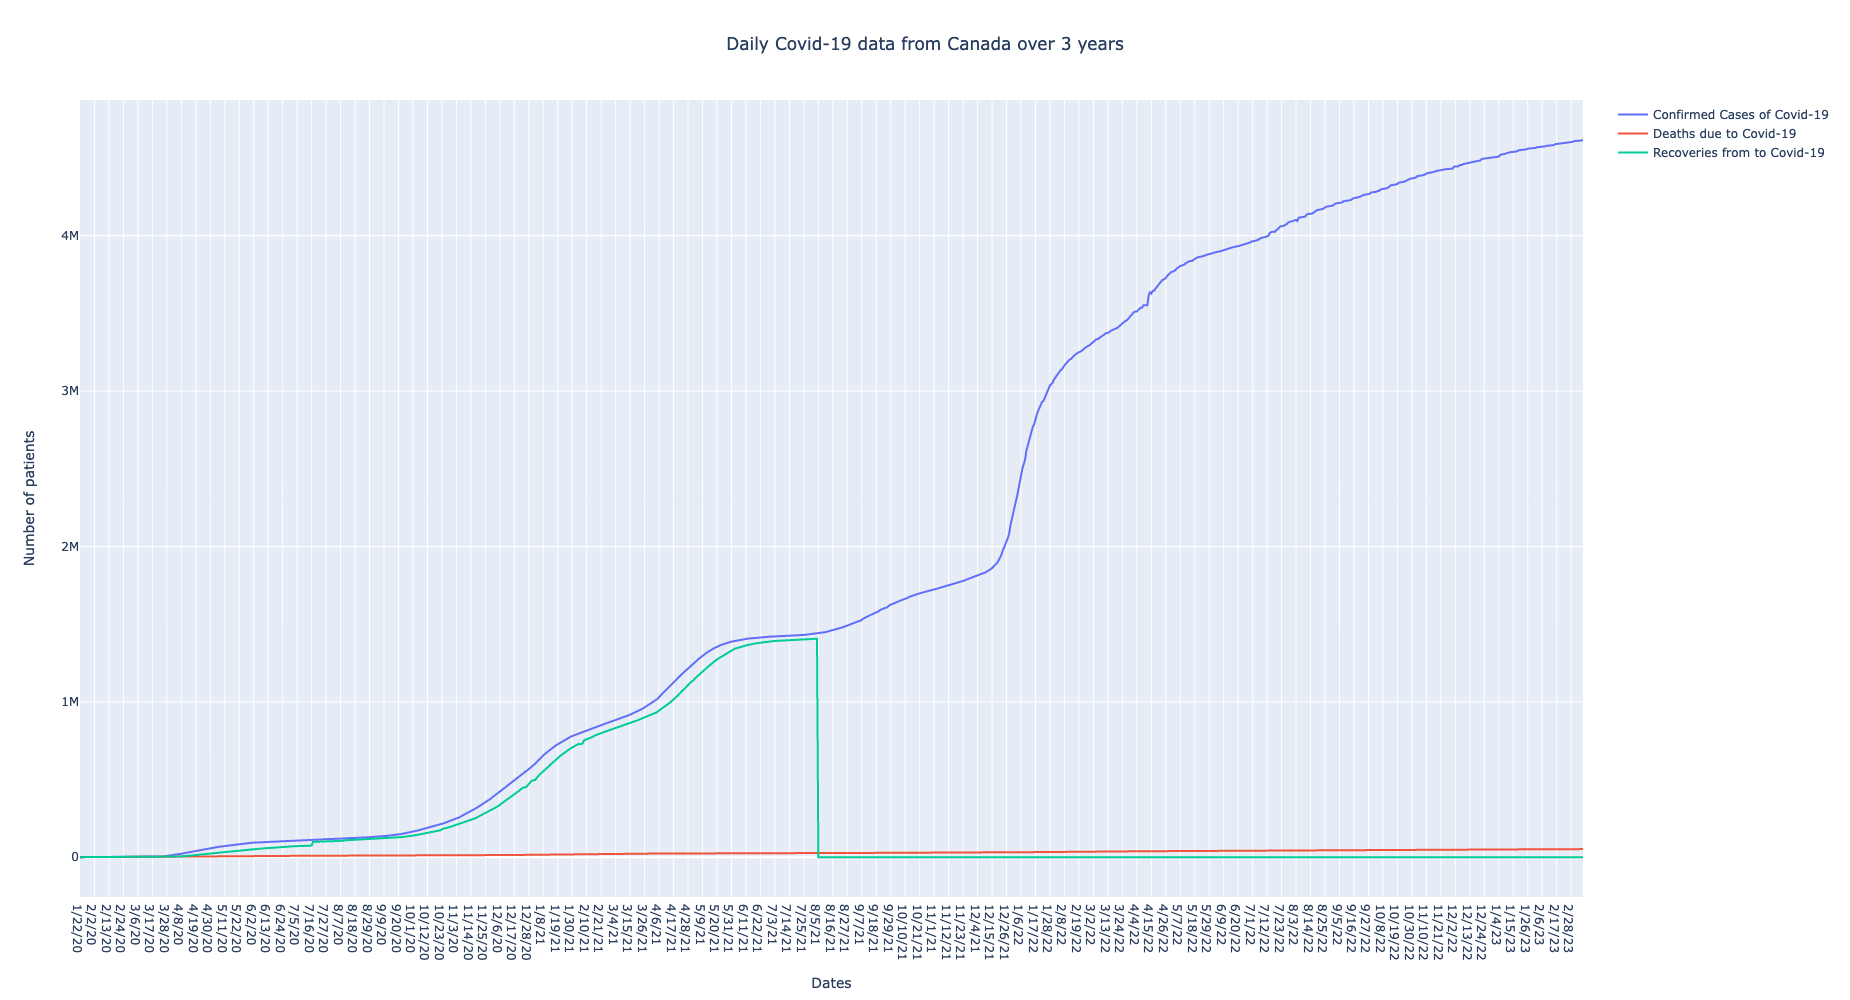

In [100]:
# create traces
trace0 = go.Scatter(
    x = df_confirmed.index,
    y = df_confirmed,
    mode = 'lines',
    name = 'Confirmed Cases of Covid-19'
)

trace1 = go.Scatter(
    x = df_death.index,
    y = df_death,
    mode = 'lines',
    name = 'Deaths due to Covid-19'
)

trace2 = go.Scatter(
    x = df_recovered.index,
    y = df_recovered,
    mode = 'lines',
    name = 'Recoveries from to Covid-19'
)


# create the data
data = [trace0, trace1, trace2]  # assign traces to data

# create the layout
layout = go.Layout(
    title = {
        'text': 'Daily Covid-19 data from Canada over 3 years', # Graph title
        'x': 0.5},
    xaxis = dict(title = 'Dates'), # x-axis label
    yaxis = dict(title = 'Number of patients'), # y-axis label
    autosize = False,
    width = 1000,
    height = 1000
)

# create the fig
fig = go.Figure(data=data,layout=layout)
fig.show()

Now, we will define the function.

In [101]:
def plot_covid_country(cntry):
    """Plots daily Covid-19 data from the input country 'cntry'."""
    df_confirmed = confirmed_clean_2.loc[cntry]
    df_death = death_clean_2.loc[cntry]
    df_recovered = recovered_clean_2.loc[cntry]
    
    # create traces
    trace0 = go.Scatter(
        x = df_confirmed.index,
        y = df_confirmed,
        mode = 'lines',
        name = 'Confirmed Cases of Covid-19'
    )

    trace1 = go.Scatter(
        x = df_death.index,
        y = df_death,
        mode = 'lines',
        name = 'Deaths due to Covid-19'
    )

    trace2 = go.Scatter(
        x = df_recovered.index,
        y = df_recovered,
        mode = 'lines',
        name = 'Recoveries from to Covid-19'
    )


    # create the data
    data = [trace0, trace1, trace2]  # assign traces to data

    # create the layout
    layout = go.Layout(
        title = {
            'text': f'Daily Covid-19 data from {cntry} over 3 years', 
            'x': 0.5},
        xaxis = dict(title = 'Dates'), # x-axis label
        yaxis = dict(title = 'Number of patients'), # y-axis label
        autosize = False,
        width = 1000,
        height = 1000
    )
    
    # create the fig
    fig = go.Figure(data=data,layout=layout)
    return fig
    

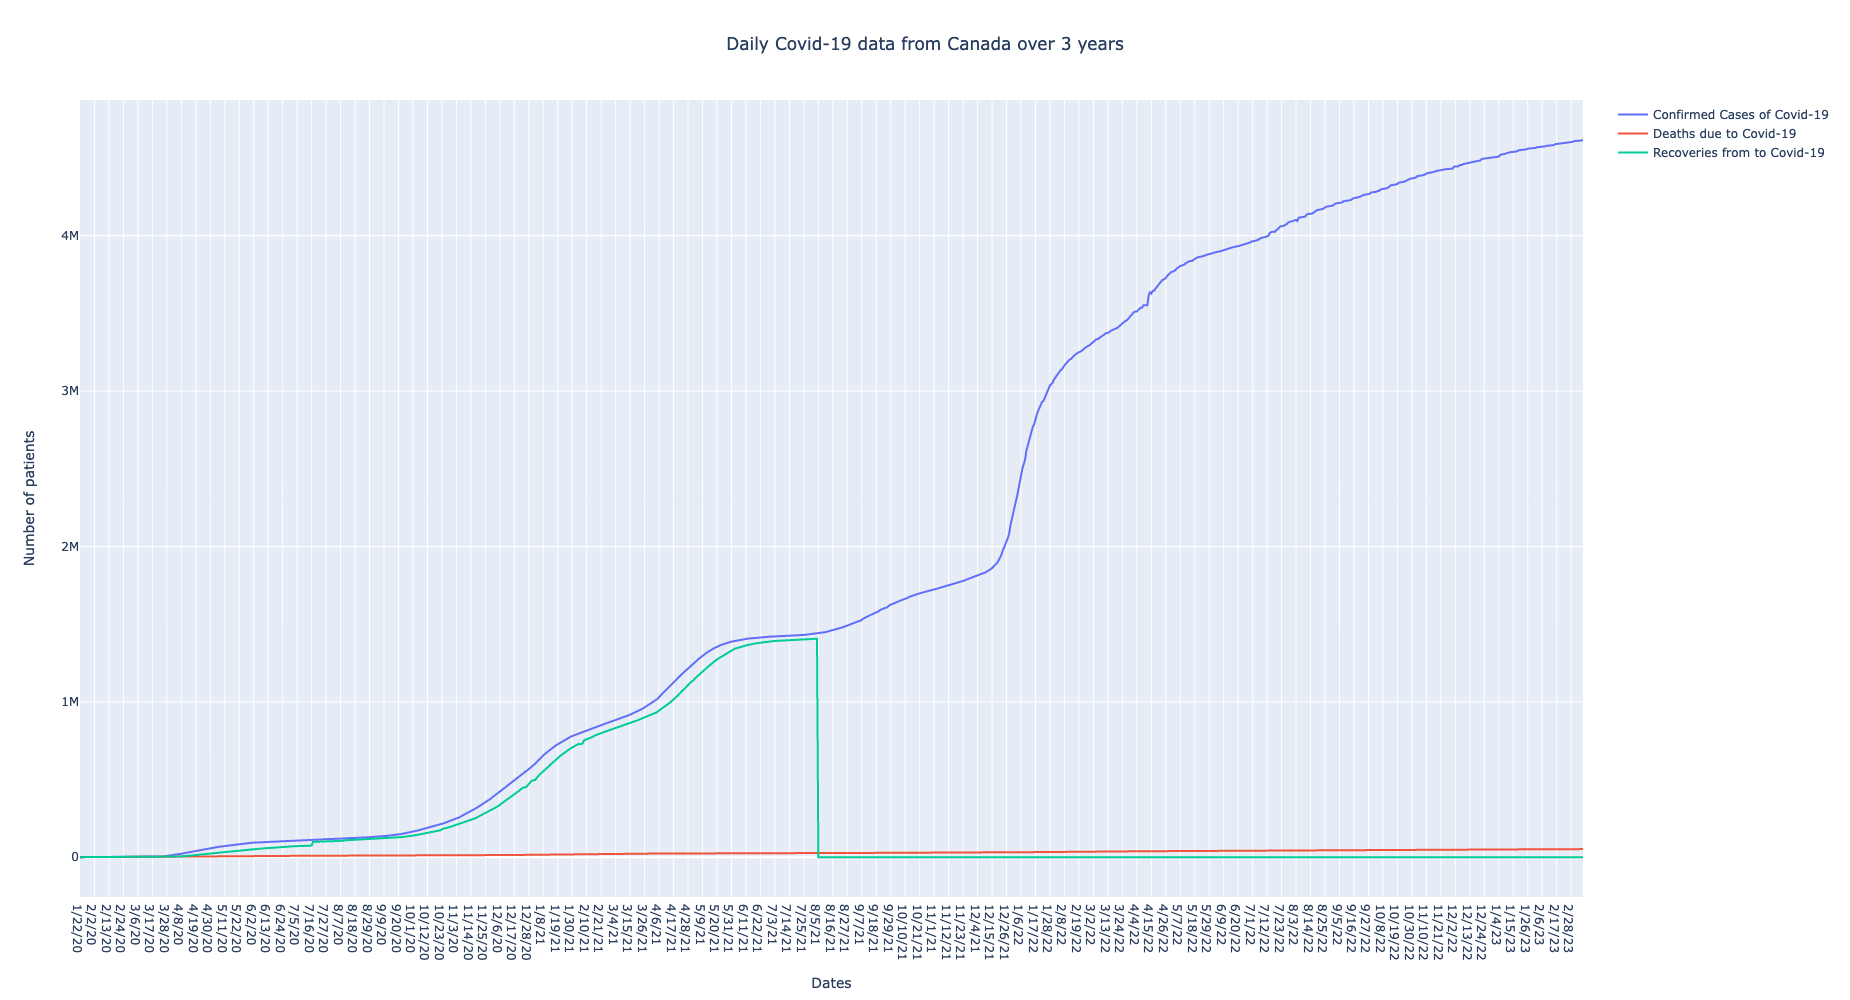

In [102]:
plot_covid_country('Canada')

**Task:** Create the same function but transform axis **y** to be on logarithmic scale.

## GDP data

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
df.tail()

COUNTRY  GDP (BILLIONS) CODE
217  Virgin Islands            5.08  VGB
218       West Bank            6.64  WBG
219           Yemen           45.45  YEM
220          Zambia           25.61  ZMB
221        Zimbabwe           13.74  ZWE

**Task:** create Choropleth map with GDP of all countries

## Stretch
**Task**: In case you still have some time try to create some interesting charts from any data we have worked with in this activity.